In [187]:
#BSM Calculations
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import log, sqrt, exp, pi
from scipy.stats import norm 
import timeit

In [185]:
#Important functions to conduct element-wise operations

#defining an elementwise log function
def elog(array):
    temp_array = []
    for item in array:
        temp_array.append(log(item))
    return np.asarray(temp_array)

#defining an elementwise exponentiation function
def eexp(array):
    temp_array = []
    for item in array:
        temp_array.append(exp(item))
    return np.asarray(temp_array)

In [183]:
#inputs
tau = 1
q_tau = 0.98
s = 100
k = np.array([95,105])
sigma = np.array([0.2104])

#define price as function of sigma in two steps
#this is set up so that either k and sigma have the same dimensions
#or one (or both) is a scalar

d = lambda k: (elog(s/(q_tau*k))+tau*sigma**2/2)/(sqrt(tau)*sigma)
call = lambda sigma: s*norm.cdf(d(k)) - q_tau*k*norm.cdf(d(k)-sqrt(tau)*sigma)

q_call = call(sigma)
print(q_call)

[ 11.9998815    7.12781638]


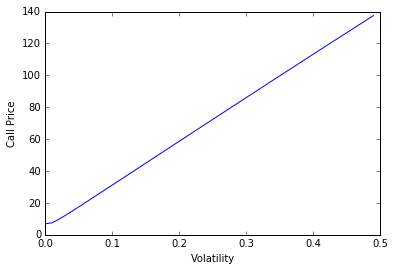

In [87]:
#Call price v. volatility
yield_ = 0.01
tau = 0.25
q_tau = exp(-tau * yield_)
s = 1388
k = q_tau*s

#define price as a function of sigma
d2 = lambda sigma: (log(s/(q_tau*k))+tau*sigma**2)/(sqrt(tau)*sigma)
call2 = lambda sigma: s*norm.cdf(d2(sigma)) - q_tau*k*norm.cdf(d2(sigma)-sqrt(tau)*sigma)

sigma = np.arange(0.0001,0.50,0.01)
q_call = call2(sigma)

plt.plot(sigma, q_call)
plt.xlabel('Volatility')
plt.ylabel('Call Price')
plt.show()

In [193]:
#Implied Volatility

#inputs
yield_ = 0.005
tau = 0.125
q_tau = exp(-tau * yield_)

#http://www.cmegroup.com/trading/equity-index/us-index/e-mini-sandp500.html
#data for 2013-11-05
s = 1757

k = np.array([1735,1740,1745,1750,1755,1760,1765,1770,1775,1780])
call_last = np.array([42.75,39.25,36.25,33.00,30.00,27.25,24.50,22.00,19.50,17.50])
data_matrix = np.column_stack((data_row1, data_row2))

#BSM formula
#define f = call price as a function of sigma, two steps for clarity (or not?)
d = lambda sigma,k : (elog(s/(q_tau*k))+tau*sigma**2/2)/(sqrt(tau)*sigma)
f = lambda sigma,k : s*norm.cdf(d(sigma,k)) - q_tau*k*norm.cdf(d(sigma,k)\
                    -sqrt(tau)*sigma)-call_last;
fp = lambda d: s*sqrt(tau)*eexp(-d**2/2)/sqrt(2*pi)

#convergence paramaters
tol =1e-8
maxit = 50

#starting values
#NB: we do this for log(sigma), which makes sure sigma is positive
x_now = 0.12 + np.zeros(k.shape)
f_now = f(x_now, k)

#Compute implied volatility
t0 = timeit.Timer() 

for it in np.arange(1,maxit):
    fp_now = fp(d(x_now,k))
    x_new = x_now - f_now/fp_now
    f_new = f(x_new,k)
    diff_x = max(abs(x_new - x_now))
    diff_f = max(abs(f_new))
    
    if max(diff_x,diff_f) < tol:
        break
    
    else:
        x_before = x_now
        x_now = x_new
        f_before = f_now
        f_now = f_new
        
#display results
it


3